In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
print(__version__)
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected= True)
cf.go_offline()
%matplotlib inline

5.10.0


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [3]:
dataset = pd.read_csv("C:/Users/kaustubh kapare/Downloads/archive/netflix.csv")

In [4]:
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [5]:
dataset.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973
4880,2021-10-11,639.419983,626.780029,633.200012,627.039978,2861200.0,627.039978


<Figure size 640x480 with 0 Axes>

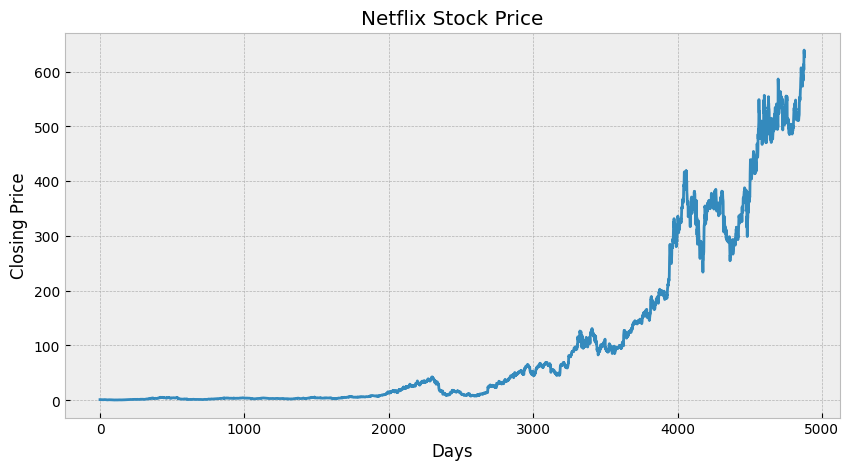

In [27]:
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Netflix Stock Price")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.plot(dataset["Close"])

In [7]:
dataset.iplot(kind="scatter",x = "Date" ,y= ["High","Open","Close","Volume","Adj Close"])

In [8]:
dataset.iplot(kind="scatter",x = "Date" ,y= ["High","Low","Open","Close"])

In [9]:
df = dataset[["Close"]]

In [10]:
df

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571
4,1.071429
...,...
4876,634.809998
4877,639.099976
4878,631.849976
4879,632.659973


In [11]:
upcoming_days = 30
df["Prediction"] = df[["Close"]].shift(-upcoming_days)
df.tail()

,Close,Prediction
4876,634.809998,NaN
4877,639.099976,NaN
4878,631.849976,NaN
4879,632.659973,NaN
4880,627.039978,NaN


In [12]:
df.tail()

,Close,Prediction
4876,634.809998,NaN
4877,639.099976,NaN
4878,631.849976,NaN
4879,632.659973,NaN
4880,627.039978,NaN


In [13]:
X = np.array(df.drop(["Prediction"],1))[:-upcoming_days]
print(X)

[[  1.19642901]
 [  1.21000004]
 [  1.157143  ]
 ...
 [547.58001709]
 [550.11999512]
 [558.91998291]]


C:\Users\kaustubh kapare\AppData\Local\Temp\ipykernel_10380\2307914518.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [14]:
y = np.array(df["Prediction"][:-upcoming_days])
print(y)

[  1.17571402   1.16071403   1.163571   ... 631.84997559 632.65997314
 627.03997803]


In [15]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.40)

In [16]:
tree = DecisionTreeRegressor().fit(X_train,y_train)

In [17]:
x_future = df.drop(["Prediction"],1)[:-upcoming_days]

C:\Users\kaustubh kapare\AppData\Local\Temp\ipykernel_10380\580059040.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [18]:
x_future = x_future.tail(upcoming_days)

In [19]:
x_future = np.array(x_future)
x_future

array([[532.2800293 ],
       [531.04998779],
       [513.63000488],
       [511.76998901],
       [515.40997314],
       [516.48999023],
       [518.90997314],
       [519.29998779],
       [514.25      ],
       [517.57000732],
       [515.15002441],
       [510.82000732],
       [517.34997559],
       [524.89001465],
       [520.54998779],
       [519.9699707 ],
       [515.84002686],
       [512.40002441],
       [510.72000122],
       [515.91998291],
       [517.91998291],
       [518.90997314],
       [521.86999512],
       [543.71002197],
       [546.88000488],
       [553.33001709],
       [553.40997314],
       [547.58001709],
       [550.11999512],
       [558.91998291]])

In [20]:
decision_tree_prediction = tree.predict(x_future)
print(decision_tree_prediction)

[566.17999268 557.59002686 582.07000732 509.10998535 577.76000977
 554.44000244 602.55499268 597.53997803 598.7199707  586.5
 577.76000977 582.86999512 586.5        539.03997803 575.42999268
 573.14001465 590.65002441 509.10998535 592.39001465 592.64001465
 583.84997559 602.55499268 610.34002686 613.15002441 603.34997559
 634.80999756 596.83999634 540.02001953 632.65997314 627.03997803]


In [21]:
predicition = list(decision_tree_prediction)
valid = df[X.shape[0]:]
valid

,Close,Prediction
4851,566.179993,NaN
4852,569.190002,NaN
4853,582.070007,NaN
4854,588.549988,NaN
4855,590.530029,NaN
4856,606.710022,NaN
4857,606.049988,NaN
4858,597.539978,NaN
4859,598.719971,NaN
4860,589.289978,NaN


In [22]:
valid.loc[:,"Prediction"]=predicition
valid

,Close,Prediction
4851,566.179993,566.179993
4852,569.190002,557.590027
4853,582.070007,582.070007
4854,588.549988,509.109985
4855,590.530029,577.760010
4856,606.710022,554.440002
4857,606.049988,602.554993
4858,597.539978,597.539978
4859,598.719971,598.719971
4860,589.289978,586.500000


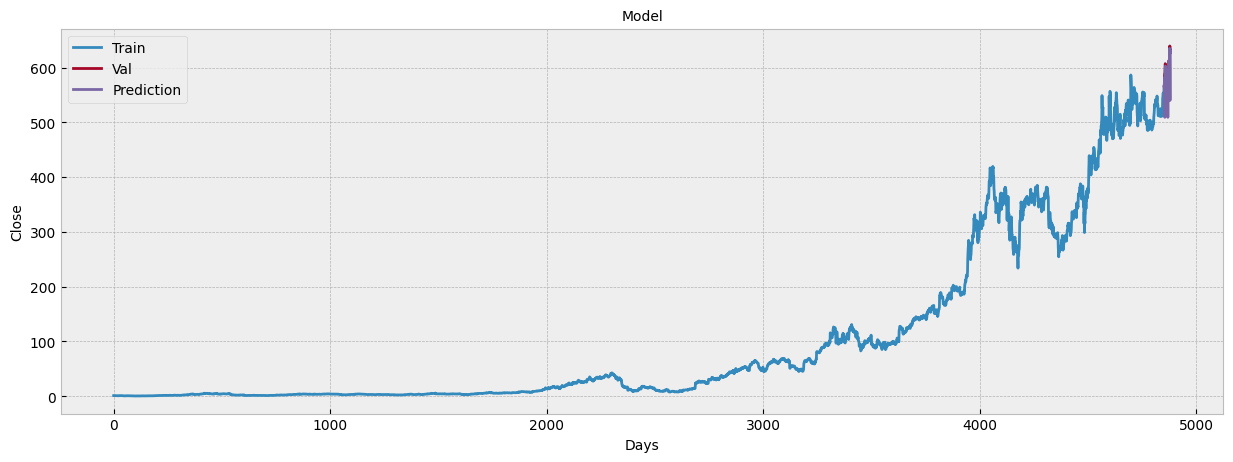

In [23]:
plt.figure(figsize=(15,5))
plt.title("Model",fontsize=10)
plt.xlabel("Days",fontsize=10)
plt.ylabel("Close",fontsize=10)
plt.plot(df["Close"])
plt.plot(valid[["Close","Prediction"]])
plt.legend(["Train","Val","Prediction"],loc="upper left")
plt.show()